# HR Data Analytics Project

## Project Overview
This project analyzes employee data from a multinational company to uncover key HR insights such as:

- Attrition trends across departments  
- Salary distribution and top earners  
- Relationship between performance ratings and compensation  
- Department-level workforce patterns

## Tools & Libraries Used:
- Python  
- Pandas  
- NumPy
- Seaborn 
- Matplotlib
- Plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

## Dataset
The dataset contains employee-level information including department, job title, hire date, salary, performance rating, and employment status.
(A sample of the dataset is included for reference.)

In [2]:
df_hr = pd.read_csv("HR_Data_MNC.csv")

## Initial Data Overview
Inspecting the dataset to understand the number of records, column types, and any missing values.

In [3]:
df_hr.shape

(2000000, 12)

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


## Data Cleaning
Deleting extra columns, and fixing necessary data types

In [5]:
# Deleting excess column "Unnamed: o"
df_hr.drop("Unnamed: 0", axis =1, inplace=True)

In [6]:
# Changing Hire_Date's Dtype to Date & Time
df_hr["Hire_Date"] = pd.to_datetime(df_hr["Hire_Date"], errors="coerce")

In [7]:
# Sanity Check to confirm above changes
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Employee_ID         object        
 1   Full_Name           object        
 2   Department          object        
 3   Job_Title           object        
 4   Hire_Date           datetime64[ns]
 5   Location            object        
 6   Performance_Rating  int64         
 7   Experience_Years    int64         
 8   Status              object        
 9   Work_Mode           object        
 10  Salary_INR          int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 167.8+ MB


## Feature Engineering
To support better analysis, creating new columns from the given data

In [8]:
# Creating a new column "Country"
df_hr["Country"] = df_hr["Location"].str.split(",").str[1].str.strip()

# Creating a new column "Hire_Year"
df_hr["Hire_Year"] = df_hr["Hire_Date"].dt.year

In [12]:
# Sanity Check of data to confirm above changes before we begin with the Analysis
df_hr.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country,Hire_Year
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark,2011
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica,2018
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia,2023
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,Antigua and Barbuda,2023
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,Palestinian Territory,2024


## Exploratory Data Analysis
As the dataset is cleaned, and necessary (forseeable) columns have been added, starting with the data analysis

**Q1: What is the distribution of Employee Status (Active, Resigned etc)**

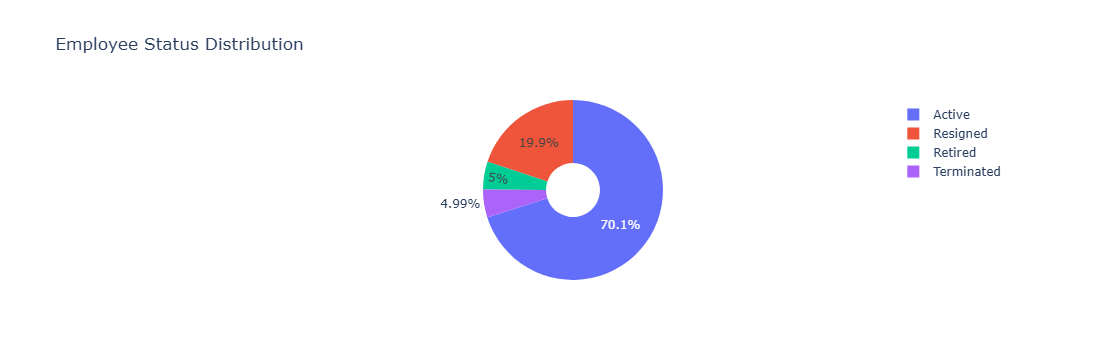

In [20]:
status_counts = df_hr["Status"].value_counts()

# Represting the info:
fig = px.pie(values = status_counts.values,
            names = status_counts.index,
            title = "Employee Status Distribution",
            hole = 0.3)
fig.show()

**Q2: How many employees are in each department?**

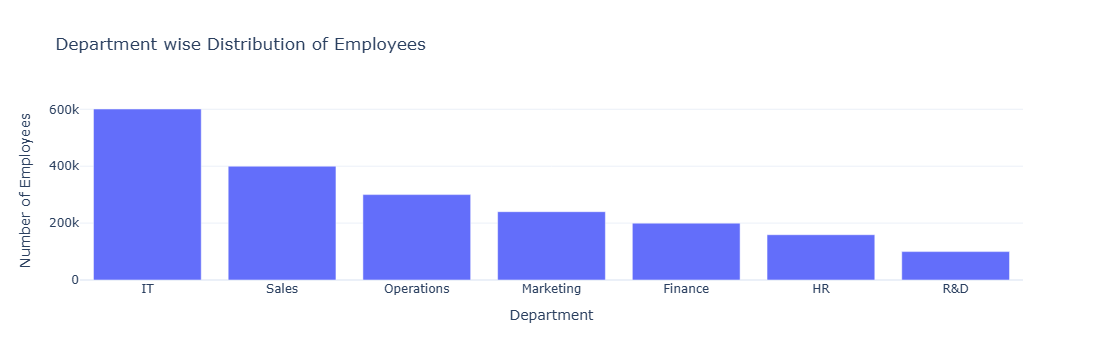

In [14]:
emp_per_dept = df_hr["Department"].value_counts()

# Represting the info:
fig = px.bar(emp_per_dept,
            x = emp_per_dept.index,
            y = emp_per_dept.values,
            labels = {"x": "Department", "y": "Number of Employees"},
            title = "Department wise Distribution of Employees")

fig.show()

**Q3: What is the average salary by department?**

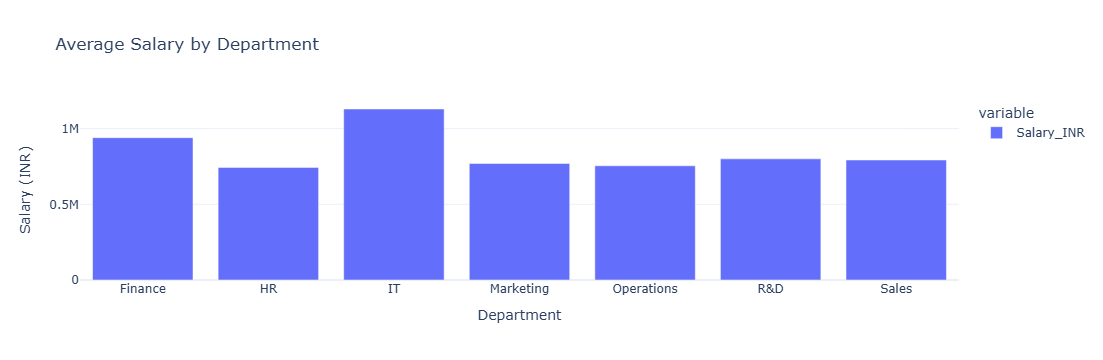

In [21]:
Avg_Sal_Dep = df_hr.groupby("Department")["Salary_INR"].mean()

#Representing the info:
fig = px.bar(Avg_Sal_Dep,
            labels = {"index": "Department", "value": "Salary (INR)"},
            title = ("Average Salary by Department"))
fig.show()

**Q4: What is the ditribution of work modes**

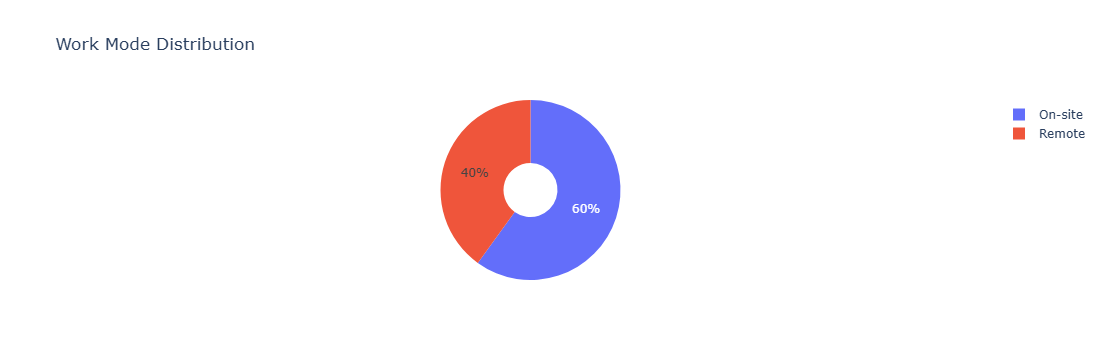

In [17]:
Work_Mode_Dis = df_hr["Work_Mode"].value_counts()

#Representing the info:

fig = px.pie(values = Work_Mode_Dis.values,
            names = Work_Mode_Dis.index,
            title = "Work Mode Distribution",
            hole = 0.3)
fig.show()

**Q5: Which is the Average Salary by Job Title**

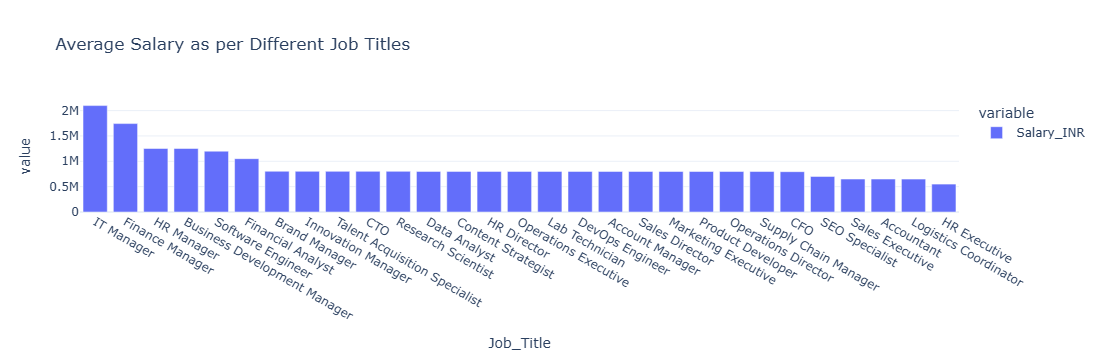

In [22]:
Average_Salary_JT = df_hr.groupby("Job_Title")["Salary_INR"].mean().sort_values(ascending = False)

#Representing the info
fig = px.bar(Average_Salary_JT,
            labels = {"index": "Job Title", "values": "Salary(INR)" },
            title = "Average Salary as per Different Job Titles")
fig.show()

**Q6: Which Job Title has the highest Salary**

In [43]:
print(f"The highest salary belongs to the Job Title: {Average_Salary_JT.nlargest(1).index[0]}")

The highest salary belongs to the Job Title: IT Manager


**Q7: How many employees Resigned & Terminated in each department**

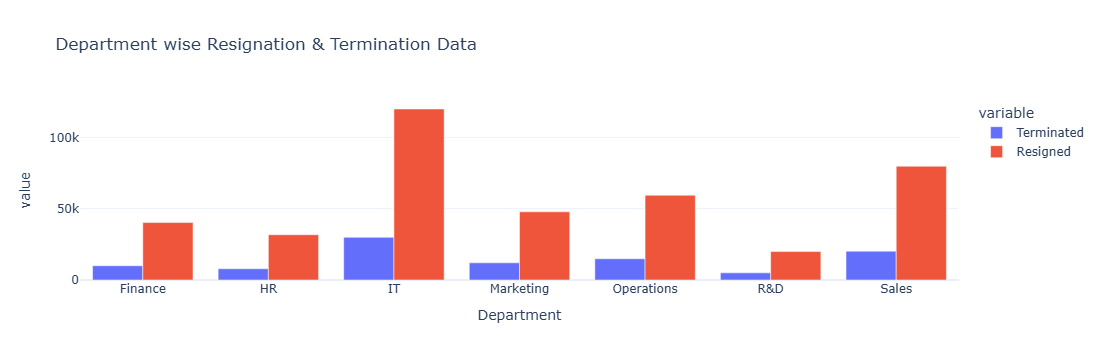

In [32]:
T_N_R = df_hr[df_hr["Status"].isin(["Resigned", "Terminated"])]

TNR_Count = pd.crosstab(T_N_R["Department"], T_N_R["Status"]).reset_index()

#Representing the info: 

fig = px.bar(TNR_Count,
            x="Department",
            y = ["Terminated", "Resigned"],
            title = "Department wise Resignation & Termination Data",
            barmode="group")
fig.show()

**Q8: How does salary vary with years of experience (Average Salaries)**

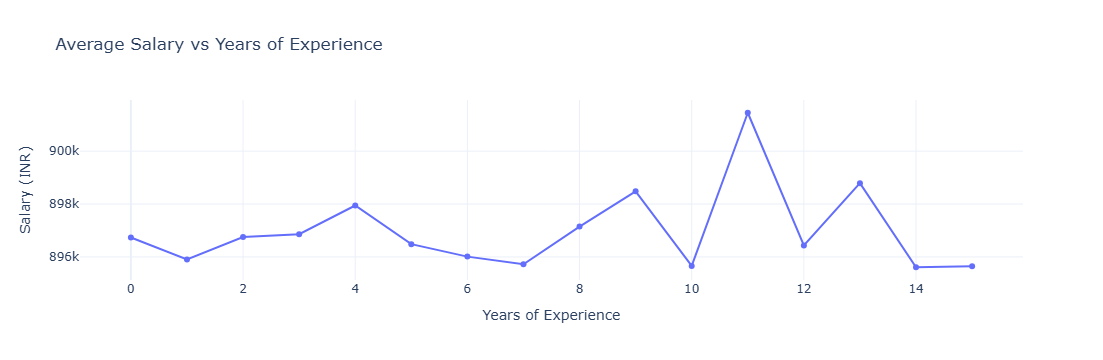

In [33]:
# How does salary vary with years of experience (Average Salaries)

Av_S_Ex = df_hr.groupby("Experience_Years")["Salary_INR"].mean().reset_index()

#Representing the info:

fig = px.line(Av_S_Ex,
             x="Experience_Years",
             y="Salary_INR",
             markers=True,
             title="Average Salary vs Years of Experience",
             labels = {"Experience_Years": "Years of Experience", "Salary_INR": "Salary (INR)"})
fig.show()

**Q9: What is the average performance rating by department?**

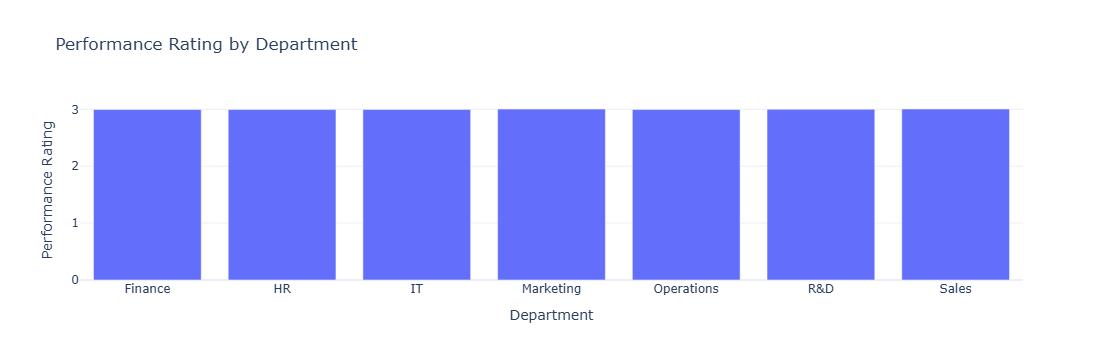

In [34]:
APR_D = df_hr.groupby("Department")["Performance_Rating"].mean().reset_index()

#Representing the info:
fig = px.bar(APR_D,
            x = "Department",
            y = "Performance_Rating",
            title = "Performance Rating by Department",
            labels = {"Performance_Rating": "Performance Rating"})
fig.show()

**Q10: Which country has the highest concentration of employees**

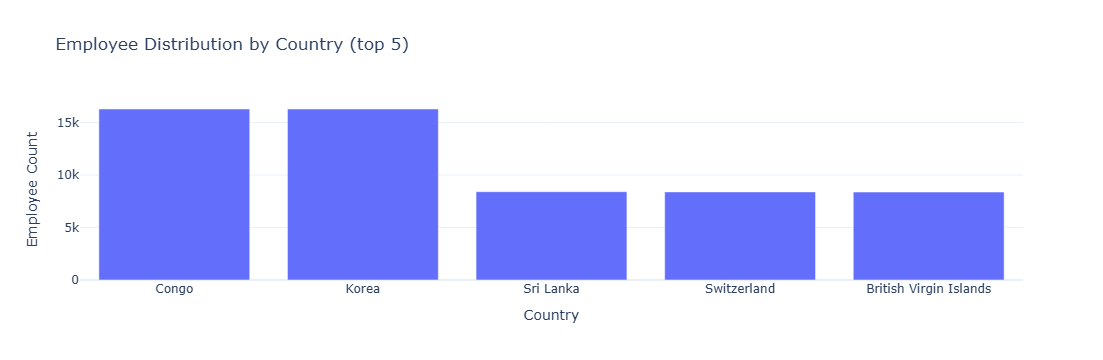

In [40]:
country_counts = df_hr["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Employee Count"]

#Representing only the top 5 info:

top_concentration = country_counts.head(5)

fig = px.bar(top_concentration,
            x="Country",
            y="Employee Count",
            title = "Employee Distribution by Country (top 5)")

fig.show()

**Q11: Is there a correlation between Performance Rating & Salary**

In [44]:
corr_value = df_hr["Performance_Rating"].corr(df_hr["Salary_INR"])
corr_value

np.float64(-0.00020919799940916325)

Q11: **There is no correaltion between Performance Rating & Salary**

**Q12: How has the number of hires changed over time (per year)?**

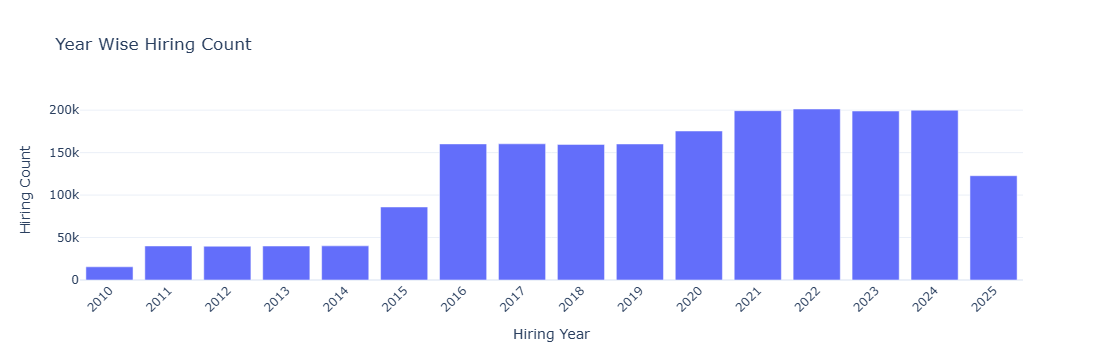

In [52]:
Hire_Count_PYear = df_hr["Hire_Year"].value_counts().reset_index()
Hire_Count_PYear.columns = ["Hiring Year", "Hiring Count"]
#Representing the info:
fig = px.bar(Hire_Count_PYear,
             x="Hiring Year",
             y="Hiring Count",
            title = "Year Wise Hiring Count")
fig.update_layout(xaxis_tickangle=-45, xaxis_tickmode = "linear")
fig.show()

**Q13: Compare Salaries of Remote vs on site employees - is there a significant difference?**

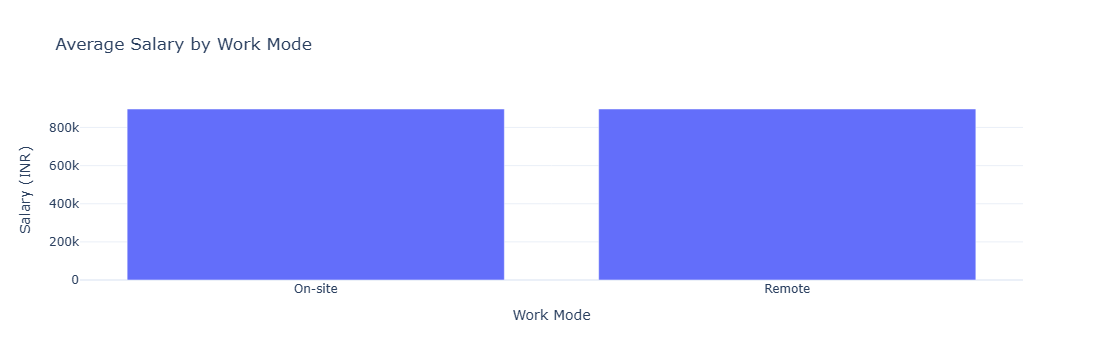

In [66]:
workmode_salary = df_hr.groupby("Work_Mode")["Salary_INR"].mean().reset_index()

#Representing the info:
fig = px.bar(workmode_salary,
            x="Work_Mode",
            y="Salary_INR",
            title="Average Salary by Work Mode",
            labels={"Work_Mode": "Work Mode", "Salary_INR": "Salary (INR)"})
fig.show()

**Q14: Find the top employees with the highest salary in each department**

In [67]:
#Creating a new Column of Ranking (Department Wise)
df_hr["Salary_Rank"] = df_hr.groupby("Department")["Salary_INR"].rank(method="dense", ascending=False)

In [68]:
top1 = df_hr[df_hr["Salary_Rank"] <=1].sort_values(["Department", "Salary_INR"], ascending =[True, False])

In [70]:
top1[["Employee_ID", "Department", "Job_Title", "Salary_INR"]]

,Employee_ID,Department,Job_Title,Salary_INR
888712,EMP0888713,Finance,Finance Manager,2499958
223845,EMP0223846,HR,HR Manager,1799839
1697605,EMP1697606,IT,IT Manager,2999976
1268998,EMP1268999,Marketing,Marketing Executive,1199997
61771,EMP0061772,Operations,Operations Executive,1199991
1601509,EMP1601510,R&D,Research Scientist,1199995
1729875,EMP1729876,Sales,Business Development Manager,1799983


**Q15: Identify departments with the highest attrition rate**

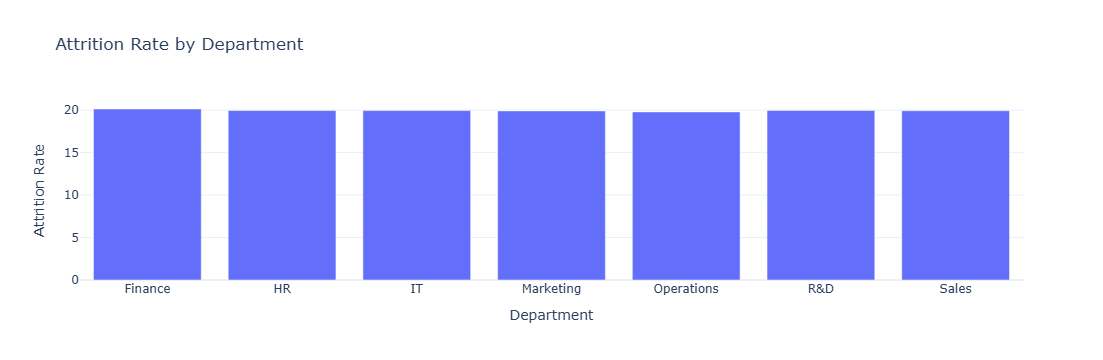

In [75]:
total_emp = df_hr["Department"].value_counts()

resigned_emp = df_hr[df_hr["Status"]=="Resigned"].groupby("Department")["Employee_ID"].count()

# Attrition Rate
attrition_rate = ((resigned_emp / total_emp) * 100).reset_index()

attrition_rate.columns = ["Department", "Attrition Rate"]

#Representint the info:

fig = px.bar(attrition_rate,
            x="Department",
            y="Attrition Rate",
            title="Attrition Rate by Department")
fig.show()

# Conclusion & Key Insights

In this HR Data Analytics project, I've explored employee workforce patterns across departments, performance, salary, experience, and attrition.

### Key Takeaways
- Employee status distribution provided an overview of workforce composition.
- Attrition analysis highlighted departments with higher resignation rates.
- Salary trends are not influenced by performance rating.
- Geographic concentration showed that employees are fairly equally divided with some few countries on a higher end (could be key locations for the company.
- Department-level salary analysis helped identify top earners and compensation differences.